In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [7]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int

In [8]:
def adder(state: AgentState) -> AgentState:
    """This node will add two numbers"""
    print('adder')
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node will subtract two numbers"""
    print('subtractor')
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will decide which node to go to next"""
    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '-':
        print('SUB 1')
        return 'subtraction_operation'

def adder2(state: AgentState) -> AgentState:
    """This node will add two numbers"""
    print('adder1')
    state['finalNumber2'] = state['number3'] + state['number4']
    print(state['finalNumber2'])

    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node will subtract two numbers"""
    print('subtractor1')
    state['finalNumber2'] = state['number3'] - state['number4']
    print(state['finalNumber2'])
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    """This node will decide which node to go to next"""
    if state['operation2'] == '+':
        print('ADD 1')
        return 'addition_operation2'
    elif state['operation2'] == '-':
        return 'subtraction_operation2'

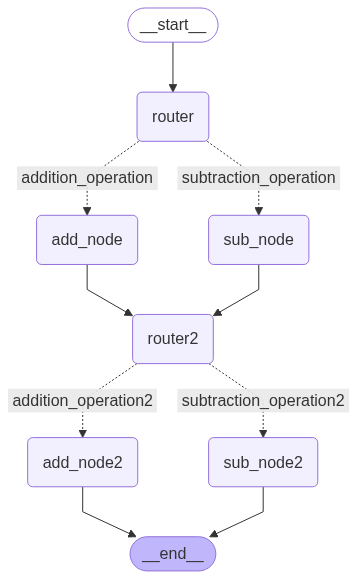

In [9]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("sub_node", subtractor)
graph.add_node("router", lambda state: state)   # pass through function

graph.add_node("add_node2", adder2)
graph.add_node("sub_node2", subtractor2)
graph.add_node("router2", lambda state: state)   # pass through function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "sub_node",
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("sub_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node1,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "sub_node2",
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)
print(app.invoke(initial_state))

SUB 1
subtractor
ADD 1
adder1
9
{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 9}
